<a href="https://colab.research.google.com/github/tanpharamut/data_viz/blob/main/Visualize_Data_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = '/content/drive/My Drive/data_viz'

In [7]:
data = pd.read_csv(os.path.join(path,'search_request.csv'))
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


#เตรียมข้อมูลแปบ

#### แปลงข้อมูลของเวลาให้เป้นตัวแปรชนิด datetime

In [8]:
data['search_timestamp']  = pd.to_datetime(data['search_timestamp'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

#กราฟแท่ง Bar chart
###กราฟผลไม้??


ส่วนประกอบกราฟแท่ง

+ ตัวกราฟแท่ง(height)
+ ตำแหน่งกราฟแท่ง (x)
+ ชื่อแท่ง (tick_label)
+ ชื่อกราฟ (plt.title)
+ ชื่อแกนx (plt.xlabel)
+ ชื่อแกนY (plt.ylabel)

### สร้างกราฟแท่งเปรียบเทียบปริมาณ คนเข้าใช้ Web Wongnai.com เพื่อค้นหาร้านอาหาร ในเเต่ละวัน

การแสดงชื่อกราฟให้เป็นภาษาไทย
+ https://medium.com/@kanyawee.work/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31

In [9]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [10]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

Text(0.5, 1.0, 'ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน')

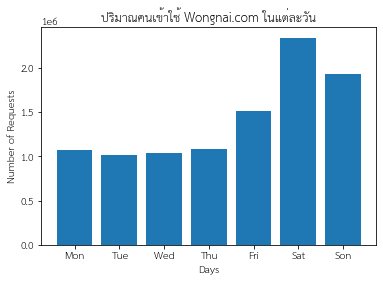

In [11]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0]
                      , data[data['search_timestamp'].dt.dayofweek == 1].shape[0]
                      , data[data['search_timestamp'].dt.dayofweek == 2].shape[0]
                      , data[data['search_timestamp'].dt.dayofweek == 3].shape[0]
                      ,  data[data['search_timestamp'].dt.dayofweek == 4].shape[0]
                      ,  data[data['search_timestamp'].dt.dayofweek == 5].shape[0]
                      ,  data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                      ], tick_label = ['Mon','Tue','Wed','Thu','Fri','Sat','Son']);
plt.xlabel('Days')
plt.ylabel('Number of Requests')
plt.title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน')

#Grouped Bar chart

##แสดงปริมาณคนเข้าเว็บแต่ละวันโดยเปรียบเทียบช่วงเวลา 11.00 - 12.00 น. กับ 23.00 - 0.00น.

In [12]:
data[(data['search_timestamp'].dt.dayofweek == 0) 
& (data['search_timestamp'].dt.time < time(hour=12)) 
& (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]

73249

In [13]:
lunch = [data[(data['search_timestamp'].dt.dayofweek == 0) & (data['search_timestamp'].dt.time < time(hour=12)) & (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
          ,data[(data['search_timestamp'].dt.dayofweek == 1) & (data['search_timestamp'].dt.time < time(hour=12)) & (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
          ,data[(data['search_timestamp'].dt.dayofweek == 2) & (data['search_timestamp'].dt.time < time(hour=12)) & (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
          ,data[(data['search_timestamp'].dt.dayofweek == 3) & (data['search_timestamp'].dt.time < time(hour=12)) & (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
          ,data[(data['search_timestamp'].dt.dayofweek == 4) & (data['search_timestamp'].dt.time < time(hour=12)) & (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
          ,data[(data['search_timestamp'].dt.dayofweek == 5) & (data['search_timestamp'].dt.time < time(hour=12)) & (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
          ,data[(data['search_timestamp'].dt.dayofweek == 6) & (data['search_timestamp'].dt.time < time(hour=12)) & (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]]
lunch

[73249, 73083, 75429, 78024, 99007, 174165, 165440]

In [14]:
midnight = [data[(data['search_timestamp'].dt.dayofweek == 0) & (data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
        ,data[(data['search_timestamp'].dt.dayofweek == 1) & (data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
        ,data[(data['search_timestamp'].dt.dayofweek == 2) & (data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
        ,data[(data['search_timestamp'].dt.dayofweek == 3) & (data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
        ,data[(data['search_timestamp'].dt.dayofweek == 4) & (data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
        ,data[(data['search_timestamp'].dt.dayofweek == 5) & (data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
        ,data[(data['search_timestamp'].dt.dayofweek == 6) & (data['search_timestamp'].dt.time >= time(hour=23))].shape[0]]
midnight

[31874, 32258, 31153, 35944, 53174, 58306, 35801]

In [15]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Son']

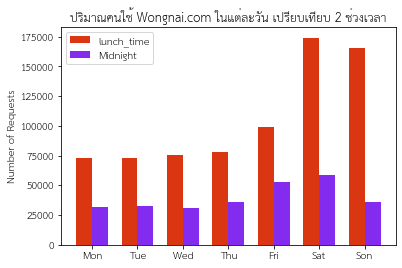

In [18]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lunch, width, label='lunch_time', color='#d93611')
rects2 = ax.bar(x + width/2,midnight, width, label='Midnight', color = '#842bf0')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Requests')
ax.set_title('ปริมาณคนใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()